### Computational Guided Inquiry for Modeling Earth's Climate (Neshyba, 2025)

# Cambio Comparisons
This code takes as input a user-generated emission scenario and runs four versions of Cambio:

- Cambio 1.0 has the five basic equations of motion, with $CO_2$ fertilization but no other feedbacks
- Cambio 2.0 adds in Henry's Law feedbacks
- Cambio 3.0 adds in ice-albedo feedback
- Cambio 4.0 adds in terrestrial sequestion feedback that reduces $CO_2$ fertilization

The code then runs the four simulations, and compares the output of a selected two of them.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import meclib.cl as cl

In [3]:
%matplotlib inline

### Loading your emission scenario
In the cell below, load in your scheduled flows file. It'll be most convenient if you use the following naming convention: 

    time, eps, epsdictionary_from_file = cl.LoadMyScenario('...')

(but of course supplying the name of a particular emission scenario). 

{'dataframe':             time  emissions
0    1750.000000   0.134987
1    1750.667780   0.136492
2    1751.335559   0.138013
3    1752.003339   0.139552
4    1752.671119   0.141107
..           ...        ...
595  2147.328881   4.000000
596  2147.996661   4.000000
597  2148.664441   4.000000
598  2149.332220   4.000000
599  2150.000000   4.000000

[600 rows x 2 columns], 't_0': 2003, 'eps_0': 9, 't_peak': 2040, 't_decarb': 15, 'k': 0.0166}


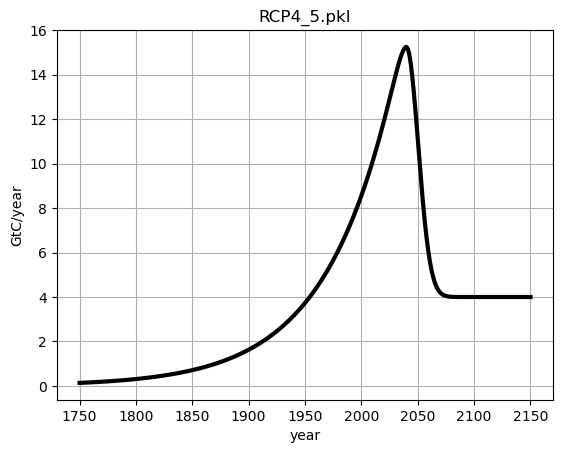

In [5]:
filename = 'RCP4_5.pkl'
time, eps, epsdictionary_from_file = cl.LoadMyScenario(filename,verbose=True)

### Creating a dictionary for climate parameters consistent with this emission scenario
In the cell below, we use the CreateClimateParams function to create a dictionary of climate parameters.

In [7]:
ClimateParams = cl.CreateClimateParams(epsdictionary_from_file)

### Running Cambio
The cell below runs Cambio versions 1-4.

In [9]:
CS_Cambio1_list = cl.run_Cambio(cl.PropagateClimateState_Cambio1, ClimateParams, time, eps)
CS_Cambio2_list = cl.run_Cambio(cl.PropagateClimateState_Cambio2, ClimateParams, time, eps)
CS_Cambio3_list = cl.run_Cambio(cl.PropagateClimateState_Cambio3, ClimateParams, time, eps)
CS_Cambio4_list = cl.run_Cambio(cl.PropagateClimateState_Cambio4, ClimateParams, time, eps)

### Individual reports

In [24]:
print('Starting state:'); print(CS_Cambio1_list[0])
print('Ending state:'); print(CS_Cambio1_list[-1])

Starting state:
{'C_atm': np.float64(590.091364164596), 'C_ocean': np.float64(410.78888417993585), 'albedo': np.float64(0.2999896768793822), 'T_anomaly': 0.0, 'pH': 8.2, 'time': np.float64(1750.6677796327212), 'F_al': np.float64(119.99967402612103), 'F_la': 120, 'F_ao': 69.58974358974359, 'F_oa': 69.58974358974359, 'F_ha': np.float64(0.13649186260348795), 'F_ocean_net': 0.0, 'F_land_net': np.float64(0.00032597387897226326), 'actual temperature': 14.0, 'OceanSurfacepH': np.float64(8.199932752744724)}
Ending state:
{'C_atm': np.float64(1198.148498980305), 'C_ocean': np.float64(748.8772422943533), 'albedo': np.float64(0.2958686536611643), 'T_anomaly': np.float64(3.516940913585054), 'pH': 8.2, 'time': np.float64(2150.000000000028), 'F_al': np.float64(123.62244979101888), 'F_la': 120, 'F_ao': np.float64(141.30069856434434), 'F_oa': np.float64(141.1692108166047), 'F_ha': np.float64(4.0), 'F_ocean_net': np.float64(-0.13148774773964078), 'F_land_net': np.float64(-3.62244979101888), 'actual tem

### Individual reports using CS_list_plots

Max of Cambio1.0 (C_atm) =  1016.2488517814327 at time  2054.5075125208896
Min of Cambio1.0 (C_atm) =  590.0911464858788 at time  1750.6677796327212
Max of Cambio1.0 (C_ocean) =  704.098581448401 at time  2061.185308848102
Min of Cambio1.0 (C_ocean) =  410.78888417993585 at time  1750.6677796327212


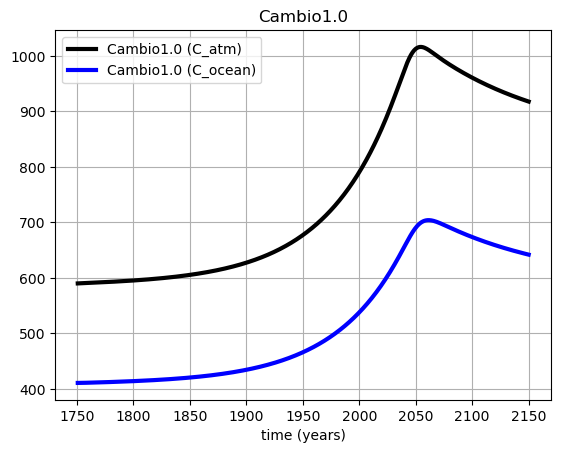

Max of Cambio1.0 (F_ha) =  15.252233588429393 at time  2039.816360601022
Min of Cambio1.0 (F_ha) =  0.13649186260348795 at time  1750.6677796327212
Max of Cambio1.0 (F_ocean_net) =  0.9291941313067014 at time  2078.5475792988545
Min of Cambio1.0 (F_ocean_net) =  -3.7841732430590582 at time  2040.4841402337433
Max of Cambio1.0 (F_land_net) =  0.0 at time  1750.6677796327212
Min of Cambio1.0 (F_land_net) =  -6.730245028127882 at time  2055.175292153611


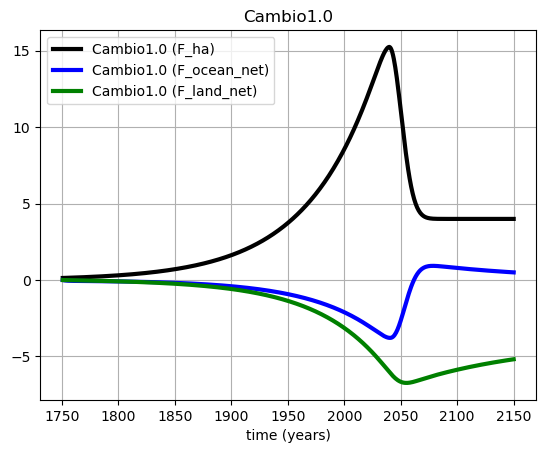

Max of Cambio1.0 (T_anomaly) =  2.167367042956437 at time  2055.175292153611
Min of Cambio1.0 (T_anomaly) =  0.0 at time  1750.6677796327212


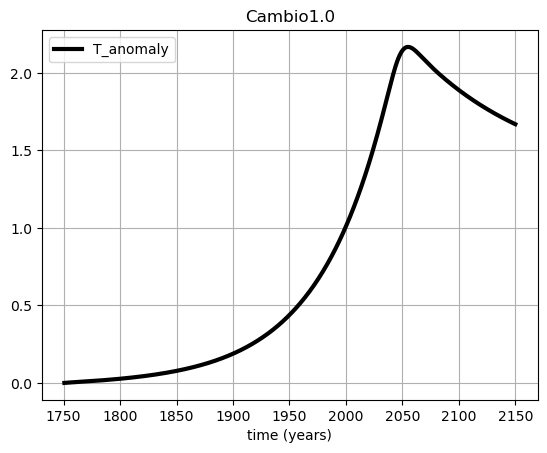

In [31]:
items_to_plot = [['C_atm','C_ocean'],['F_ha','F_ocean_net','F_land_net'],'T_anomaly']
cl.CS_list_plots(CS_Cambio1_list,'Cambio1.0',items_to_plot)

### Comparison plots using CS_list_compare

Max of Cambio1.0 (C_atm) =  1016.2488517814327 at time  2054.5075125208896
Min of Cambio1.0 (C_atm) =  590.0911464858788 at time  1750.6677796327212
Max of Cambio4.0 (C_atm) =  1198.148498980305 at time  2150.000000000028
Min of Cambio4.0 (C_atm) =  590.091364164596 at time  1750.6677796327212
Max of Cambio1.0 (C_ocean) =  704.098581448401 at time  2061.185308848102
Min of Cambio1.0 (C_ocean) =  410.78888417993585 at time  1750.6677796327212
Max of Cambio4.0 (C_ocean) =  748.8772422943533 at time  2150.000000000028
Min of Cambio4.0 (C_ocean) =  410.78888417993585 at time  1750.6677796327212


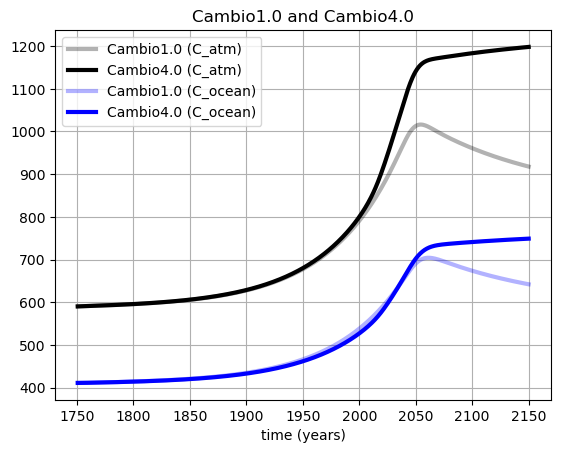

Max of Cambio1.0 (F_ha) =  15.252233588429393 at time  2039.816360601022
Min of Cambio1.0 (F_ha) =  0.13649186260348795 at time  1750.6677796327212
Max of Cambio4.0 (F_ha) =  15.252233588429393 at time  2039.816360601022
Min of Cambio4.0 (F_ha) =  0.13649186260348795 at time  1750.6677796327212
Max of Cambio1.0 (F_ocean_net) =  0.9291941313067014 at time  2078.5475792988545
Min of Cambio1.0 (F_ocean_net) =  -3.7841732430590582 at time  2040.4841402337433
Max of Cambio4.0 (F_ocean_net) =  0.0 at time  1750.6677796327212
Min of Cambio4.0 (F_ocean_net) =  -4.498095630444212 at time  2040.4841402337433
Max of Cambio1.0 (F_land_net) =  0.0 at time  1750.6677796327212
Min of Cambio1.0 (F_land_net) =  -6.730245028127882 at time  2055.175292153611
Max of Cambio4.0 (F_land_net) =  0.00032597387897226326 at time  1750.6677796327212
Min of Cambio4.0 (F_land_net) =  -3.62244979101888 at time  2150.000000000028


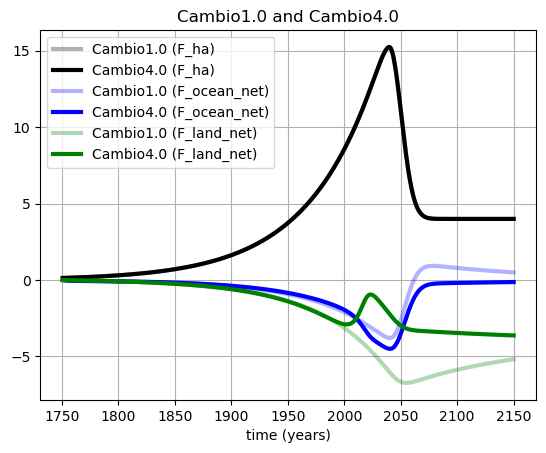

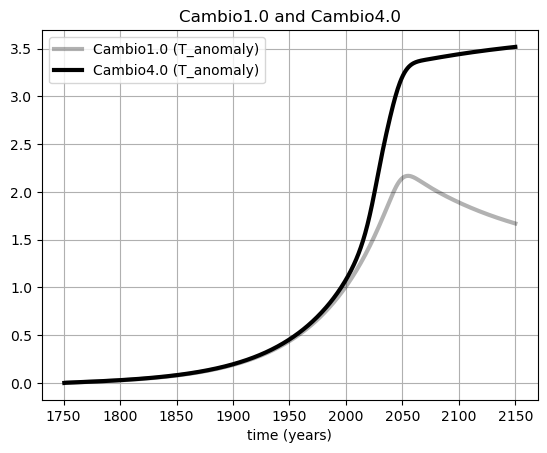

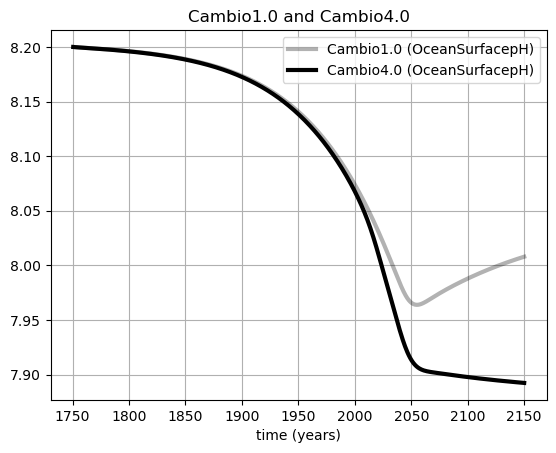

In [15]:
items_to_plot = [['C_atm','C_ocean'],['F_ha','F_ocean_net','F_land_net'],'T_anomaly','OceanSurfacepH']
cl.CS_list_compare([CS_Cambio1_list,CS_Cambio4_list],['Cambio1.0','Cambio4.0'],items_to_plot)